In [387]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

# 定义一个简单的线性模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

# 创建固定的输入数据和目标数据
torch.manual_seed(0)
data = torch.randn(2, 10)  # 20个样本，每个样本10个特征
targets = torch.randn(2, 1)
# 创建数据集
dataset = TensorDataset(data, targets)

# 初始化模型、损失函数和优化器
model1 = SimpleModel()
criterion = nn.MSELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)

# 方法一：使用 batch_size=5
dataloader1 = DataLoader(dataset, batch_size=2, shuffle=False)



In [365]:
inputs_1[1][0] * ( target - targets[1]) * 2


tensor([3.9182], grad_fn=<MulBackward0>)

In [368]:
inputs_1[0][0] * ( target - targets[0]) * 2


tensor([-3.8399], grad_fn=<MulBackward0>)

In [389]:
target = model1(inputs_1[1])
loss = criterion(target,targets[1])
loss.backward()
#optimizer1.step()
loss /= 2
#print gradients of the model parameters
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(name, param.grad)
print(loss,'loss')


fc.weight tensor([[ 0.0783, -3.2083,  2.9162,  2.8256,  4.6108, -7.5938,  1.3648,  9.7371,
          7.0382, -0.3921]])
fc.bias tensor([6.1248])
tensor(0.9208, grad_fn=<DivBackward0>) loss


In [390]:
optimizer1.step()
next(model1.parameters())

Parameter containing:
tensor([[ 0.0158, -0.1300,  0.0243, -0.3235, -0.2746, -0.0871,  0.1859,  0.0880,
         -0.2106, -0.0075]], requires_grad=True)

In [383]:

for inputs_1, targets in dataloader1:
    optimizer1.zero_grad()
    outputs = model1(inputs_1)
    print(outputs,targets,'dataloader1 outputs')
    loss = criterion(outputs, targets)
    print(targets,outputs,'dataloader1 targets')
    loss.backward()
    optimizer1.step()
    #check graditn of model1
    for name, param in model1.named_parameters():
        if param.requires_grad:
            print(name, param.grad)
    print(f'Loss: {loss},mean loss: {loss.mean()}')
    break
print(next(model1.parameters()))


tensor([[ 0.8133],
        [-0.1521]], grad_fn=<AddmmBackward0>) tensor([[-0.8920],
        [-1.5091]]) dataloader1 outputs
tensor([[-0.8920],
        [-1.5091]]) tensor([[ 0.8133],
        [-0.1521]], grad_fn=<AddmmBackward0>) dataloader1 targets
fc.weight tensor([[ 0.0392, -1.6041,  1.4581,  1.4128,  2.3054, -3.7969,  0.6824,  4.8685,
          3.5191, -0.1960]])
fc.bias tensor([3.0624])
Loss: 2.3748865127563477,mean loss: 2.3748865127563477
Parameter containing:
tensor([[ 0.0162, -0.1461,  0.0389, -0.3094, -0.2515, -0.1251,  0.1927,  0.1367,
         -0.1754, -0.0094]], requires_grad=True)


In [241]:

# 方法二：使用 batch_size=1，累积多个批次的输出然后一次性计算损失并反向传播
dataloader2 = DataLoader(dataset, batch_size=1, shuffle=False)
accumulation_steps = 5
logits_list = []
targets_list = []
inputs_2_list = []
loss_acc = 0
print("\nMethod 2 (batch_size=1, accumulate 5 batches):")
for batch_idx, (inputs_2, targets) in enumerate(dataloader2):
    inputs_2_list.append(inputs_2)
    outputs = model1(inputs_2)
    loss = criterion(outputs, targets)
    loss.backward()
    #check gradienet
    for name, param in model1.named_parameters():
        if param.requires_grad:
            print(name, param.grad)
    loss_acc += loss.item()
    logits_list.append(outputs)
    targets_list.append(targets)
    print(loss.item(),'7777')

    if (batch_idx + 1) % accumulation_steps == 0:
        #all_logits = torch.cat(logits_list)
        #all_targets = torch.cat(targets_list)
        #print(all_logits,all_targets,'dataloader2 all_logits')
        #optimizer1.step()
        #logits_list = []
        #targets_list = []
        print(f'Accumulated Loss: {loss_acc/5},{loss_.item()}')
        break
    




Method 2 (batch_size=1, accumulate 5 batches):
fc.weight tensor([[ 0.3222,  0.3297,  0.0717,  0.1242, -0.2429, -0.1980,  0.0904,  0.6053,
         -0.0922,  0.3615]])
fc.bias tensor([-0.2861])
0.020470213145017624 7777
fc.weight tensor([[ 0.0821,  0.1184, -0.0105, -0.7247, -1.0088, -0.0284,  1.0182,  1.7685,
         -0.4809, -0.1828]])
fc.bias tensor([-0.9720])
0.11761268973350525 7777
fc.weight tensor([[ 0.0573,  0.1828,  0.0036, -0.8015, -1.0399, -0.0042,  1.0254,  1.7609,
         -0.5384, -0.2485]])
fc.bias tensor([-1.0135])
0.00042905681766569614 7777
fc.weight tensor([[ 2.6786, -2.1542, -1.6960, -0.7140,  1.8835,  0.4885,  0.3873,  0.6757,
          0.9665, -1.3431]])
fc.bias tensor([1.7566])
1.9183471202850342 7777
fc.weight tensor([[ 3.7872, -4.5832,  6.5077, 17.6813, -6.3753, -6.1681, 10.2024, -2.2991,
         -6.1819, -0.3261]])
fc.bias tensor([7.1503])
7.2730183601379395 7777
Accumulated Loss: 1.8659754880238324,1.8659756183624268


In [380]:

# 方法二：使用 batch_size=1，累积多个批次的输出然后一次性计算损失并反向传播
dataloader2 = DataLoader(dataset, batch_size=1, shuffle=False)
accumulation_steps = 2
logits_list = []
targets_list = []
inputs_2_list = []
loss_acc = 0
print("\nMethod 2 (batch_size=1, accumulate 5 batches):")
for batch_idx, (inputs_2, targets) in enumerate(dataloader2):
    inputs_2_list.append(inputs_2)
    outputs = model1(inputs_2)
    #check gradienet

    loss_acc += loss.item()
    logits_list.append(outputs)
    targets_list.append(targets)
    print(loss.item(),'7777')

    if (batch_idx + 1) % accumulation_steps == 0:
        #all_logits = torch.cat(logits_list)
        #all_targets = torch.cat(targets_list)
        #print(all_logits,all_targets,'dataloader2 all_logits')
        loss = criterion(torch.cat(logits_list), torch.cat(targets_list))
        loss.backward()
        #optimizer1.step()
        #logits_list = []
        #targets_list = []
        for name, param in model1.named_parameters():
            if param.requires_grad:
                print(name, param.grad)
        print(f'Accumulated Loss: {loss_acc/2}')
        break
    



Method 2 (batch_size=1, accumulate 5 batches):
2.3748865127563477 7777
2.3748865127563477 7777
fc.weight tensor([[ 0.0392, -1.6041,  1.4581,  1.4128,  2.3054, -3.7969,  0.6824,  4.8685,
          3.5191, -0.1960]])
fc.bias tensor([3.0624])
Accumulated Loss: 2.3748865127563477


In [71]:
# 方法二：累积多个批次的 logits 然后进行一次反向传播
accumulation_steps = 5  # 在 4 个批次后进行一次反向传播
logits_list = []
targets_list = []

for epoch in range(1):  # 仅演示一个 epoch
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        outputs = model1(inputs)
        print(outputs)
        logits_list.append(outputs)
        targets_list.append(targets)

        if (batch_idx + 1) % accumulation_steps == 0:
            optimizer2.zero_grad()
            all_logits = torch.cat(logits_list)
            all_targets = torch.cat(targets_list)
            loss = criterion(all_logits, all_targets)
            print(all_logits,all_targets,loss,'loss')
            #loss.backward()
            #optimizer2.step()
            logits_list = []
            targets_list = []
            print(f'Method 2 - Epoch: {epoch+1}, Batch: {batch_idx+1}, Loss: {loss.item()}')
        break


tensor([[0.1161],
        [0.2823],
        [0.0194],
        [0.6673],
        [1.1197]], grad_fn=<AddmmBackward0>)


In [381]:
next(model1.parameters())

Parameter containing:
tensor([[ 0.0166, -0.1621,  0.0535, -0.2953, -0.2285, -0.1630,  0.1995,  0.1854,
         -0.1402, -0.0114]], requires_grad=True)

In [1]:
#
from monai.transforms import Compose,EnsureChannelFirst,RandFlipd,CenterSpatialCrop
import SimpleITK as sitk
import torch
img = sitk.ReadImage('../Data/Mixed_HGP/CILM_CT_10033_0.nii.gz')
img_array = sitk.GetArrayFromImage(img).reshape(1,26,212,245)

print(img_array.shape)
#img_array = torch.from_numpy(img_array).unsqueeze(0)
transforms = Compose([CenterSpatialCrop((12,12,12))])
img_array = transforms(img_array)
img_array.shape



SyntaxError: invalid syntax (2780705442.py, line 14)

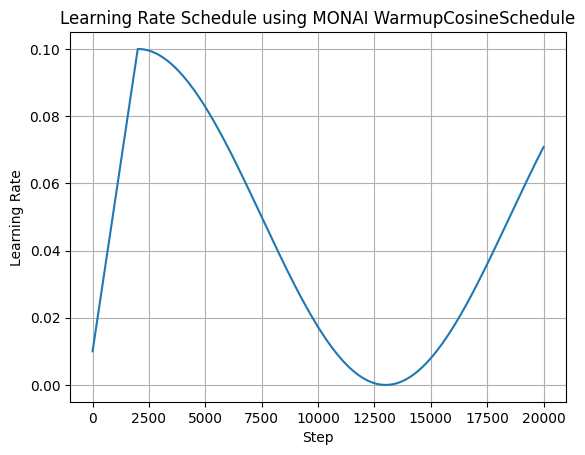

In [7]:
import math
import matplotlib.pyplot as plt
from monai.optimizers.lr_scheduler import WarmupCosineSchedule
from torch.optim import SGD
import torch

# 创建示例参数
initial_lr = 0.1
warmup_steps = 2000
t_total = 13000
end_lr = 0.0
cycles = 1
warmup_multiplier = 0.1

# 创建一个参数张量用于优化器
params = torch.nn.Parameter(torch.tensor([0.0]))

# 创建优化器
optimizer = SGD([params], lr=initial_lr)

# 创建调度器
scheduler = WarmupCosineSchedule(
    optimizer=optimizer,
    warmup_steps=warmup_steps,
    t_total=t_total,
    end_lr=end_lr,
    cycles=0.5,
    warmup_multiplier=warmup_multiplier,
)

# 模拟运行20000步，记录每一步的学习率
lrs = []
for step in range(20000):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

# 绘制学习率变化图
plt.plot(lrs)
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule using MONAI WarmupCosineSchedule")
plt.grid()
plt.show()


# check array


In [17]:
import numpy as np
from torch.nn.functional import softmax
import torch
correct_array = np.load('../Data/test/Confi_lg_tm_plus_5_0/0/correct_array.npy')
logit_array = np.load('../Data/test/Confi_lg_tm_plus_5_0/0/logit_array.npy')
soft_max_array = np.load('../Data/test/Confi_lg_tm_plus_5_0/0/softmax_array.npy')

logit_tennsor = torch.from_numpy(logit_array)



softmax_tennsor = softmax(logit_tennsor, dim=1)


(tensor([[0.5448, 0.4552],
         [0.5928, 0.4072],
         [0.5465, 0.4535],
         [0.5520, 0.4480],
         [0.5571, 0.4429],
         [0.5519, 0.4481],
         [0.5505, 0.4495]]),
 array([[0.54483104, 0.45516896],
        [0.59276843, 0.40723157],
        [0.5464891 , 0.4535109 ],
        [0.55201524, 0.44798478],
        [0.55706173, 0.4429382 ],
        [0.55190283, 0.44809717],
        [0.55045736, 0.44954264]], dtype=float32))